## Loading Data And checking for inconsistencies

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae

In [2]:
fuel_data = pd.read_csv('../Data/auto-mpg.csv')

In [3]:
fuel_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
fuel_data.shape

(398, 9)

In [5]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
fuel_data['horsepower'] = pd.to_numeric(fuel_data['horsepower'], errors = "coerce")
fuel_data['horsepower'] = fuel_data['horsepower'].fillna(value = fuel_data['horsepower'].mean())

In [7]:
fuel_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Exploratory Data Analysis

In [8]:
import seaborn as sns

In [9]:
fuel_data['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [10]:
fuel_data['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [11]:
fuel_data['origin'] = fuel_data['origin'].astype(object)

In [12]:
fuel_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [13]:
fuel_data.select_dtypes('number').corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


<Axes: >

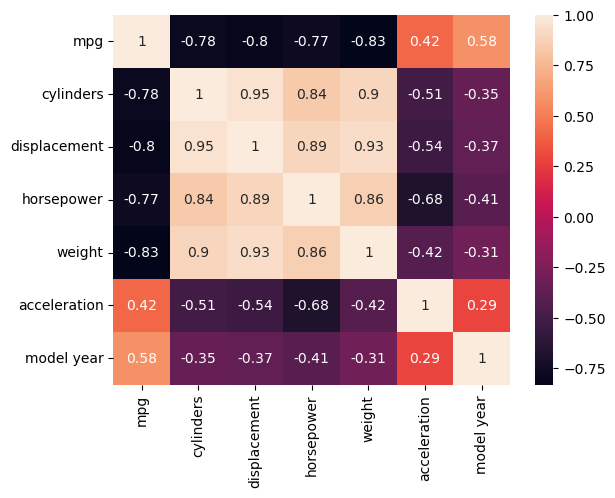

In [14]:
sns.heatmap(fuel_data.select_dtypes('number').corr(), annot = True)

<Axes: xlabel='mpg', ylabel='Count'>

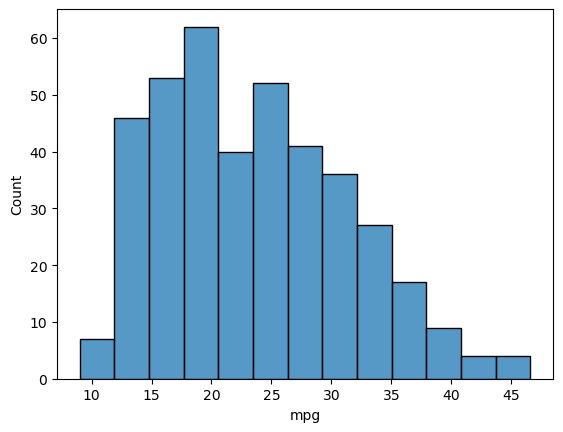

In [15]:
sns.histplot(fuel_data['mpg'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


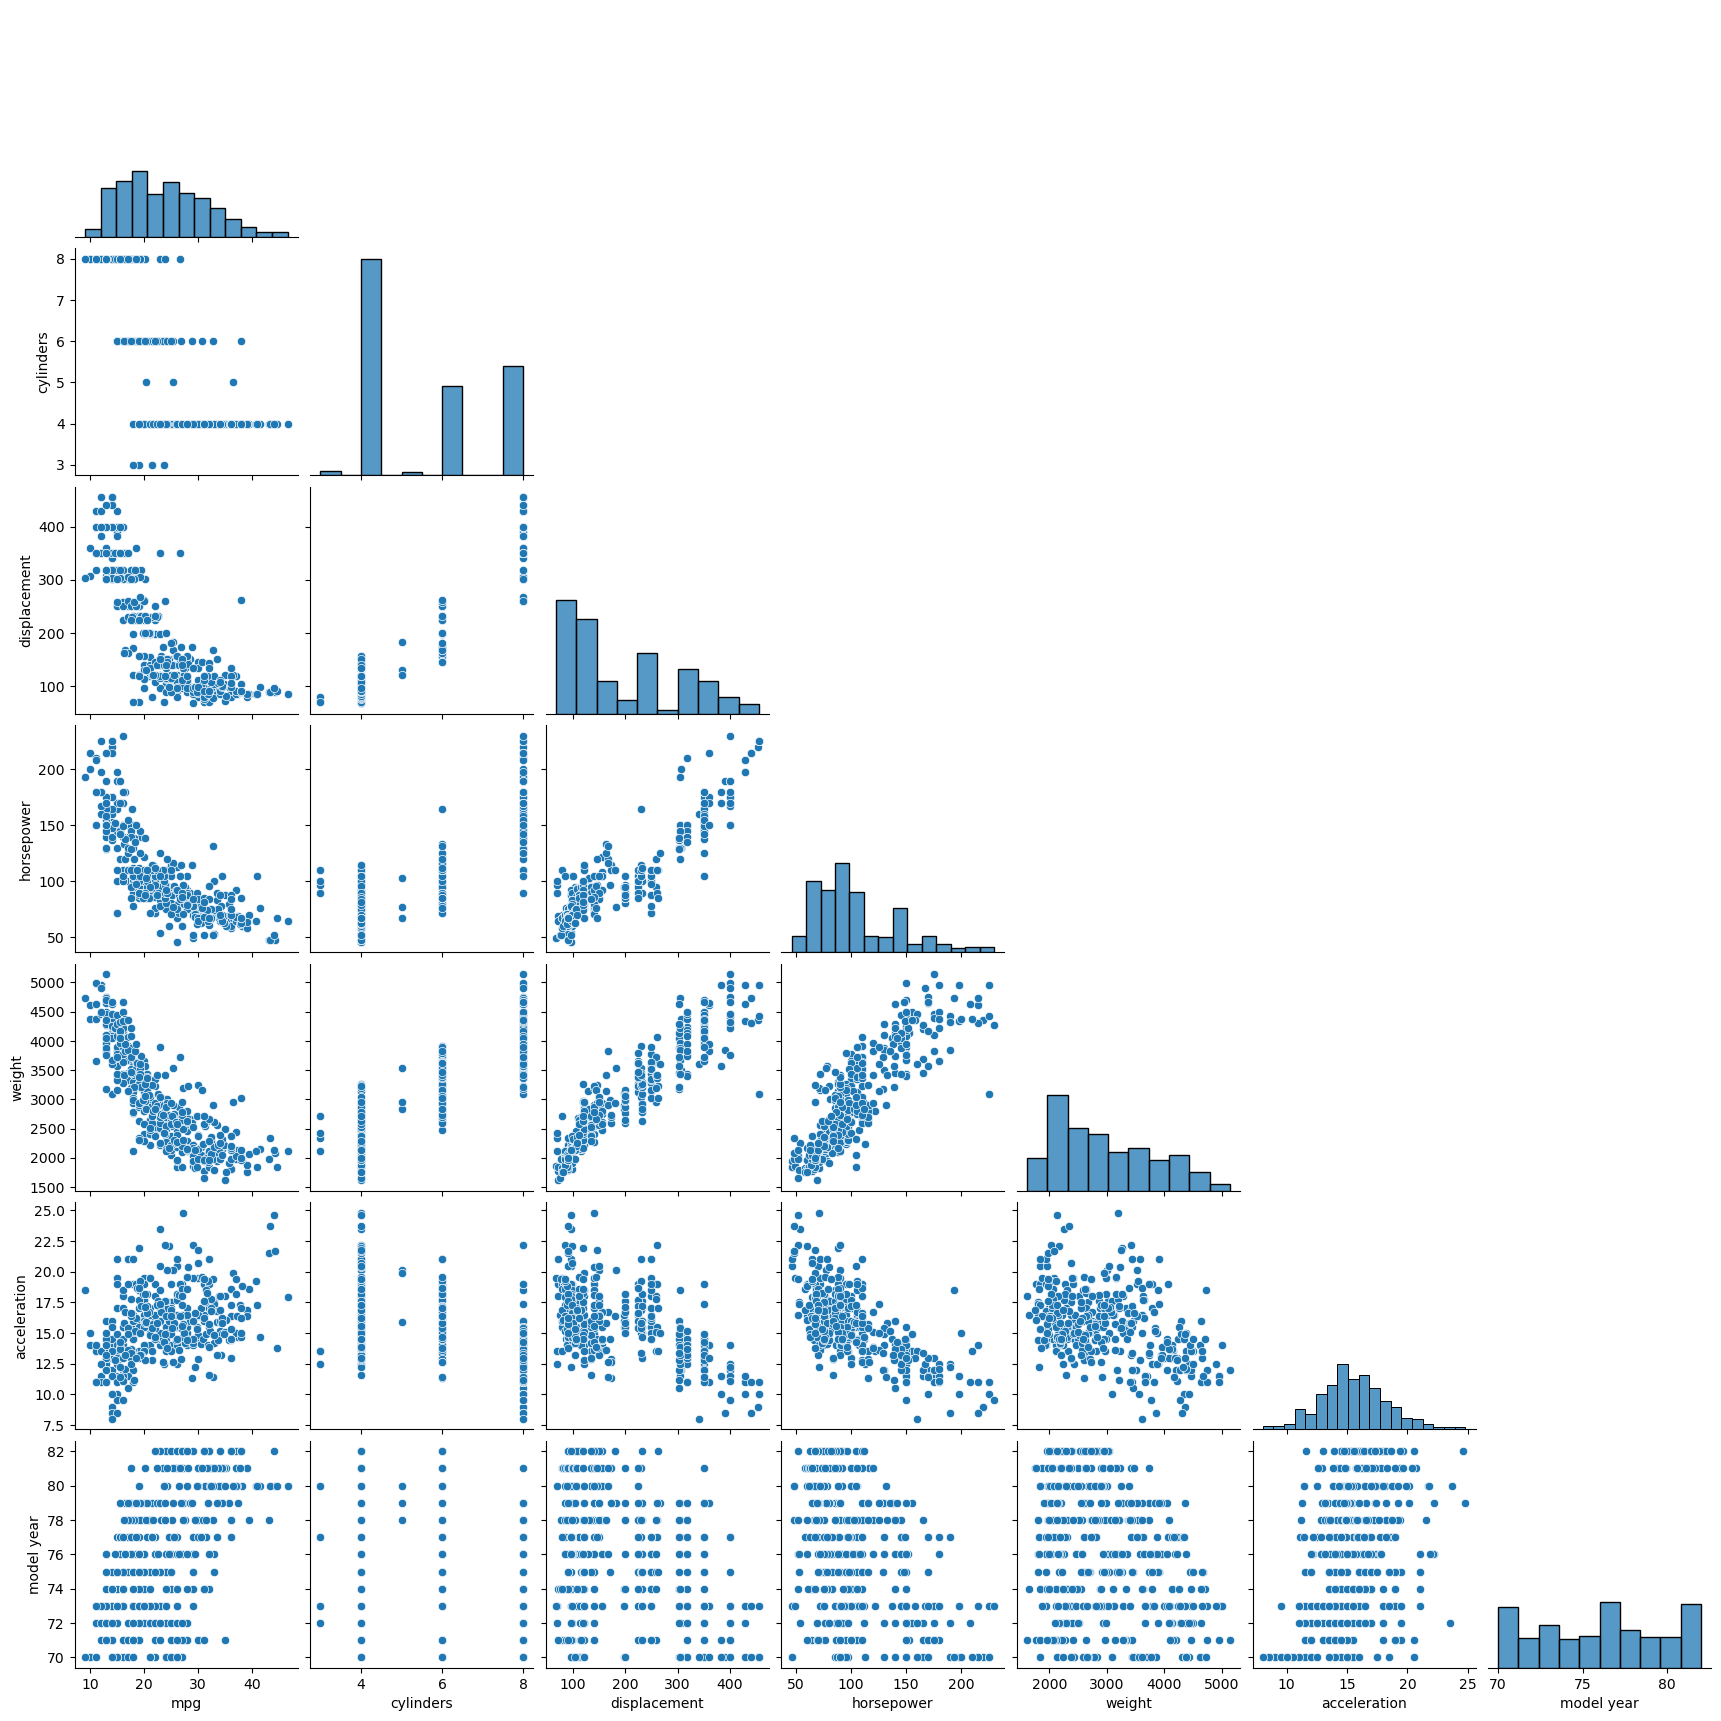

In [16]:
sns.pairplot(fuel_data.select_dtypes('number'), corner = True)

In [17]:
fuel_data = pd.concat([fuel_data, pd.get_dummies(fuel_data['origin'], drop_first= True).astype(int)], axis = 1)

In [18]:
df = fuel_data.drop('origin', axis=1)

In [19]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration', 'model_year', 'car_name','origin2','origin3']

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin2,origin3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,0


## Regression

### 1. Fitting Baseline Regression Model using the highest correlated feature: Weight

In [21]:
#Data Splitting 

X = sm.add_constant(df[['weight']])
y = df["mpg"]

X, X_test, y, y_test = train_test_split(X, y, test_size = .3, random_state = 2024)

In [22]:
#cross validation

kf = KFold(n_splits=4, shuffle=True, random_state=2024)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append Validation score to list 
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")


All Validation R2s:  [0.629, 0.726, 0.738, 0.709]
Cross Val R2s: 0.701 +- 0.043
All Validation MAEs:  [3.324, 2.952, 3.263, 3.431]
Cross Val MAEs: 3.243 +- 0.178


In [27]:
model = sm.OLS(y, X).fit()

In [28]:
print(f"Test R-Squared: {r2(y_test, model.predict(X_test),)}")
print(f"Test MAE: {mae(y_test, model.predict(X_test),)}")

Test R-Squared: 0.6322196894703727
Test MAE: 3.535648345923141


## Feature Engineering for Multiple Regression

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin2,origin3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,0


In [30]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [31]:
df['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

<Axes: xlabel='cylinders'>

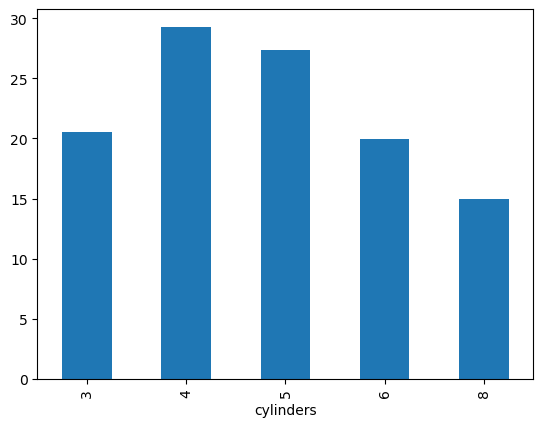

In [32]:
df.groupby('cylinders')['mpg'].mean().plot(kind='bar')

In [33]:
df['weight2'] = df['weight']**2

In [35]:
#As there's clearly multicollinearity between the features, the best way forward would be addition of a multinomial term

### Multiple Regression

In [36]:
#Data Splitting 

X = sm.add_constant(df[['weight',
                        #'acceleration',
                        #'displacement',
                        #'horsepower',
                        #'cylinders',
                        'weight2',
                        'model_year','origin2', 'origin3']])
y = df["mpg"]

X, X_test, y, y_test = train_test_split(X, y, test_size = .3, random_state = 2024)

In [37]:
#cross validation

kf = KFold(n_splits=4, shuffle=True, random_state=2024)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append Validation score to list 
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")


All Validation R2s:  [0.819, 0.851, 0.879, 0.877]
Cross Val R2s: 0.857 +- 0.024
All Validation MAEs:  [2.248, 2.321, 2.127, 2.092]
Cross Val MAEs: 2.197 +- 0.092


In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     260.9
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           2.63e-86
Time:                        18:43:16   Log-Likelihood:                -513.82
No. Observations:                 209   AIC:                             1040.
Df Residuals:                     203   BIC:                             1060.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8101      5.189      0.542      0.589      -7.421      13.042
weight        -0.0205      0.002     -9.958      0.000      -0.025      -0.016
weight2     2.228e-06   3.16e-07      7.046      0.000     1.6e-06    2.85e-06
model_year     0.7904      0.058     13.729      0.000       0.677       0.904
origin2        1.8467      0.611      3.024      0.003       0.643       3.051
origin3        0.9125      0.642      1.421      0.157      -0.354       2.179
==============================================================================
Omnibus:                       19.970   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.932
Skew:                           0.576   Prob(JB):                     3.16e-07
Kurtosis:                       4.452   Cond. No.                     2.93e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Scoring on the Test dataset

In [39]:
model = sm.OLS(y, X).fit()

In [40]:
print(f"Test R-Squared: {r2(y_test, model.predict(X_test),)}")
print(f"Test MAE: {mae(y_test, model.predict(X_test),)}")

Test R-Squared: 0.8150680423923418
Test MAE: 2.2937974289268


## Ruling out Assumptions of Linear Regression

### 1. Linearity

<Axes: >

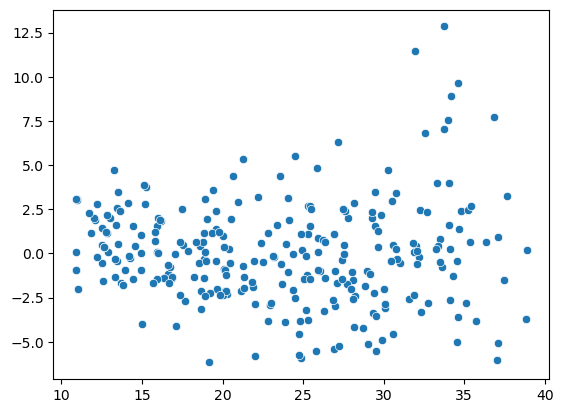

In [41]:
sns.scatterplot(x = model.predict(), y = model.resid)

### 2. Independence of Errors

In [42]:
# Based on the Durbin Watson test value of 1.953, this assumption is not being violated as it is between 1.5 and 2.5

### 3. Normality of Errors

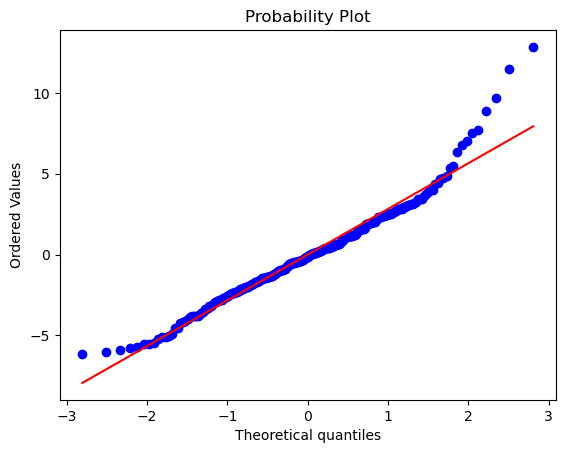

In [43]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(model.resid, dist = 'norm', plot = plt);

### 4.  No Perfect Multicollinearity

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [45]:
variables = sm.OLS(y, X).exog

pd.Series([vif(variables, i) for i in range(variables.shape[1])], index = X.columns)

const         658.590847
weight         72.387977
weight2        69.633985
model_year      1.159923
origin2         1.384952
origin3         1.653818
dtype: float64

### 5. Ridge Regression for comparison

In [46]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_tr = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [47]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(X_tr, y)
print(ridge_model.score(X_tr, y))
print(mae(y, ridge_model.predict(X_tr)))
print(ridge_model.alpha_)

0.8692625552389717
2.128846427247508
0.1289890261253308


In [48]:
print(ridge_model.score(X_te, y_test))
print(mae(y_test, ridge_model.predict(X_te)))

0.8158640198043172
2.2852788851604715
